In [202]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential #base keras model
from keras.layers import Dense, Activation #dense = fully connected layer
from tensorflow.keras.optimizers.legacy import SGD #this is just tensorflow.keras.optimizers on earlier versions of tf


In [223]:
#if any of these give you problems, make sure you've installed all libraries used (pandas, sklearn, and matplot lib)
# using conda install or pip install
# see the moodle page "Instructions for setting up and using Python and Jupyter" for more info on how to do this
import pandas as pd
import matplotlib
from sklearn.feature_extraction import _stop_words
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [302]:
# This assumes the IMDBsubset.csv file lives in a directory called "data" which lives in the same directory as this notebook.
# ***if you want to edit this notebook to use a different dataset, edit this to specify a different file:
df = pd.read_csv("train.csv")

In [303]:
df

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you know how to play, very easy to master. I've made it to floor 1000 before, but due to certain circumstances was unable to finish. Was not game related, don't worry, not a bug/glitch or antyhing.I highly recommend this for casual play, maybe with a friend or two watching. Hilarity ensues, especially once you hit floor 150. Have fun my fellow fleshlings!",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A side note, though: When are we getting windowed mode? My computer hates fullscreen so.... yeah. The computer doesn't like to run this. Shame, because this is really enjoyable. But until then, I guess I'll settle for more Skyrim. Cheers!",1
4,5,Spooky's Jump Scare Mansion,2015.0,"Not many games have the cute tag right next to the horror tag on Steam.I first played this game in late 2014 and coming back to it for the first time since. This game is so good for it being free, take advantage and experience it. Try and get to room 1000 or as close as you can. The further you progress the darker the game becomes.",1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,"Arguably the single greatest mmorp that exists today, and now its free!!!! There is little to no competition for this game. Graphics that bend to a weak ♥♥♥♥♥♥ computer, as well as an extreme graphics option offering the most insanely beautiful graphics a pc game has every brought you, but i warn you, even the most high end computers have a hard time handling extreme mode ;) mine rocks it but yeah.Many classes, and races.however you must pay to unlock classes, (well worth the money considering the game is free now) but you dont need to pay to unlock all the classes or races, you can just buy one you want. Appearance armor that goes on over your currently equipped gear and weapons, keep the stats, and the style. Huge guilds, with guild halls you can create that are vast decorative buildings, many houses and house items to create and craft or find.God quests that take you on expansive journies to connect your ties with the chosen of the land. Huge raid dungeons. and more.",1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own charm and holds a special place in my heart - having played it since I was young. Definitely still has some grind if you want to run through *all* of the content, but if someone just wanted to get right into the action, I'm fairly certain he or she could get up to speed quickly. Pretty expansive variety of races and classes, with few restrictions if any (evil races can play as good classes by betraying and vice versa).I would still recommend buying a subscription if you want to play endgame content (removes most limitations), and unfortunately there ar

In [304]:
pd.set_option('display.max_colwidth', None) #show me everything in the column, even if it's long!
df #Show me the first and last few examples

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you know how to play, very easy to master. I've made it to floor 1000 before, but due to certain circumstances was unable to finish. Was not game related, don't worry, not a bug/glitch or antyhing.I highly recommend this for casual play, maybe with a friend or two watching. Hilarity ensues, especially once you hit floor 150. Have fun my fellow fleshlings!",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A side note, though: When are we getting windowed mode? My computer hates fullscreen so.... yeah. The computer doesn't like to run this. Shame, because this is really enjoyable. But until then, I guess I'll settle for more Skyrim. Cheers!",1
4,5,Spooky's Jump Scare Mansion,2015.0,"Not many games have the cute tag right next to the horror tag on Steam.I first played this game in late 2014 and coming back to it for the first time since. This game is so good for it being free, take advantage and experience it. Try and get to room 1000 or as close as you can. The further you progress the darker the game becomes.",1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,"Arguably the single greatest mmorp that exists today, and now its free!!!! There is little to no competition for this game. Graphics that bend to a weak ♥♥♥♥♥♥ computer, as well as an extreme graphics option offering the most insanely beautiful graphics a pc game has every brought you, but i warn you, even the most high end computers have a hard time handling extreme mode ;) mine rocks it but yeah.Many classes, and races.however you must pay to unlock classes, (well worth the money considering the game is free now) but you dont need to pay to unlock all the classes or races, you can just buy one you want. Appearance armor that goes on over your currently equipped gear and weapons, keep the stats, and the style. Huge guilds, with guild halls you can create that are vast decorative buildings, many houses and house items to create and craft or find.God quests that take you on expansive journies to connect your ties with the chosen of the land. Huge raid dungeons. and more.",1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own charm and holds a special place in my heart - having played it since I was young. Definitely still has some grind if you want to run through *all* of the content, but if someone just wanted to get right into the action, I'm fairly certain he or she could get up to speed quickly. Pretty expansive variety of races and classes, with few restrictions if any (evil races can play as good classes by betraying and vice versa).I would still recommend buying a subscription if you want to play endgame content (removes most limitations), and unfortunately there ar

In [306]:
# Transform a dataframe containing a column named "review" 
# such that each row becomes represented by a set of word counts, corresponding to the number of each term in the review

#These next two lines perform word counting:
vectorizer = CountVectorizer(stop_words='english', min_df=0.01)
#stop_words='english' removes very common english words that are unlikely to be useful (e.g. "and", "the")
#min_df=0.1 removes very rare words that are likely to be typos, uninformative, etc.
# You can type ?CountVectorizer in its own cell to read its documentation
#***Note that "df['review']" is used below because "review" is the name of the column containing our text in the dataframe
#If you apply this to your own data, you may probably need to change this column name!
matrix = vectorizer.fit_transform(df['user_review'])
# matrix = vectorizer.fit_transform(df['title'].fillna(''))
data = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [307]:
data #prints data to screen

,10,100,1000,11,12,15,20,200,25,30,...,wow,write,wrong,ww2,xp,yeah,year,years,yes,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17491,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
17492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [318]:
data["like"]

0        1
1        0
2        0
3        1
4        0
        ..
17489    0
17490    1
17491    2
17492    0
17493    0
Name: like, Length: 17494, dtype: int64

In [373]:
#or the word hate:
data["best"]

0        0
1        1
2        0
3        0
4        0
        ..
17489    0
17490    0
17491    1
17492    0
17493    0
Name: best, Length: 17494, dtype: int64

In [374]:
data["great"]

0        0
1        0
2        0
3        1
4        0
        ..
17489    0
17490    0
17491    3
17492    0
17493    0
Name: great, Length: 17494, dtype: int64

In [375]:
X_train, X_test, y_train, y_test = train_test_split(data, df['user_suggestion'], test_size=0.2, random_state=0)

In [376]:
#If you ever want to learn more about a function, you can always use ? 
?train_test_split

In [377]:

# We can examine it a bit using np.shape:
np.shape(X_train) #What does our training data look like? It's 800 rows, with 1674 dimensions of input (features)

(13995, 975)

In [413]:
#Now let's make a simple neural network with 1 hidden layer containing 10 neurons
num_neurons = 30 # neurons in each layer
model = Sequential()

#Make the first (hidden) layer, which will have num_neurons neurons. Each neuron will get inputs from all columns of the dataframe, except sentiment
#model.add(Dense(num_neurons, input_dim=len(data.columns)-1))
model.add(Dense(num_neurons, input_dim=np.shape(X_train)[1]))
model.add(Activation('sigmoid')) #Now we'll use a sigmoid activation function

#Now let's add another layer for the output: A single sigmoid neuron.
model.add(Dense(1)) 
model.add(Activation('sigmoid'))

In [414]:
#Use compile() to set up our training

# For loss, we'll use binary cross-entropy loss, 
# which is appropriate for a binary classification problem (0/1 for negative/positive)
# ***If you edit this notebook to apply it to a multi-class classification problem, you'll need 
#    to change the loss to something like categorical_crossentropy, and you'll also need to change the
#    encoding of the class to a one hot representation (see https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)


model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [415]:
y_train

12877    1
6304     0
13955    0
3750     1
5925     1
        ..
9225     1
13123    1
9845     1
10799    0
2732     0
Name: user_suggestion, Length: 13995, dtype: int64

In [416]:
#Train it!
# Plus store history of training in a variable called "history"
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
438/438 [==============================] - 1s 1ms/step - loss: 0.6797 - accuracy: 0.5666 - val_loss: 0.6733 - val_accuracy: 0.5713
Epoch 2/30
438/438 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.5856 - val_loss: 0.6608 - val_accuracy: 0.5885
Epoch 3/30
438/438 [==============================] - 0s 1ms/step - loss: 0.6514 - accuracy: 0.6069 - val_loss: 0.6479 - val_accuracy: 0.6050
Epoch 4/30
438/438 [==============================] - 0s 1ms/step - loss: 0.6368 - accuracy: 0.6292 - val_loss: 0.6337 - val_accuracy: 0.6339
Epoch 5/30
438/438 [==============================] - 0s 1ms/step - loss: 0.6211 - accuracy: 0.6547 - val_loss: 0.6189 - val_accuracy: 0.6771
Epoch 6/30
438/438 [==============================] - 0s 1ms/step - loss: 0.6045 - accuracy: 0.6804 - val_loss: 0.6027 - val_accuracy: 0.6822
Epoch 7/30
438/438 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.7058 - val_loss: 0.5870 - val_accuracy: 0.7013
Epoch 

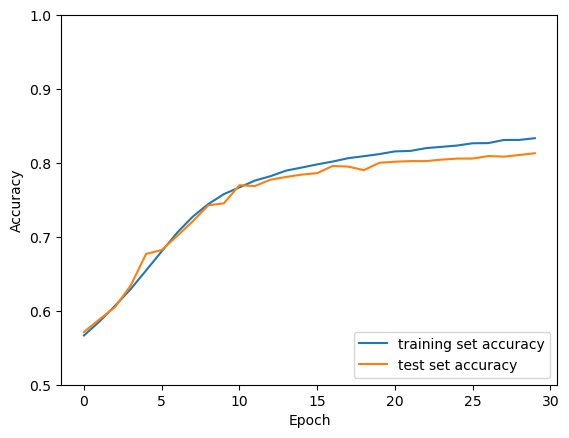

In [417]:
plt.plot(history.history['accuracy'], label='training set accuracy')
plt.plot(history.history['val_accuracy'], label = 'test set accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [383]:
#For instance, let's make z the first test example:
z = X_test.iloc[[0]]

#and let's output the prediction for this example:
model.predict(z)

1/1 [==============================] - 0s 41ms/step


array([[0.6836806]], dtype=float32)

In [384]:

y_test.iloc[[0]]

610    1
Name: user_suggestion, dtype: int64

In [385]:
test_ids = list(X_test.index) #gets the original indices in the df dataframe
#test_ids[n] now refers to the id number of the nth test example
originalReview = df.iloc[[test_ids[0]]].review
originalReview

AttributeError: 'DataFrame' object has no attribute 'review'

In [257]:
# Turns a text string into a dataframe example (***Note you'll need to change this from 'review' for your own dataset)
def createExample(myText):

    newExample = np.array([[myText]])
    tdf = pd.DataFrame(newExample, columns=["review"])
    matrix = vectorizer.transform(tdf['review'])
    newDf = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
    return newDf

In [258]:
#Here's a text about zombies
myText = "This movie is about zombies zombies zombies"
t = createExample(myText) #When we print the dataframe, you see zombies' word count is 3:
t

,000,10,100,11,12,13,14,15,16,17,...,worth,www,year,years,york,young,youtu,youtube,youtubers,yt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
#应用该模型对你的新文本进行分类：
model.predict(t)

2023-04-23 22:52:51.820562: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Matrix size-incompatible: In[0]: [1,1040], In[1]: [1556,100]
	 [[{{node sequential_10/dense_21/BiasAdd}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_10/dense_21/BiasAdd' defined at (most recent call last):
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/yk/fg8d24cd7bx81wr521s7l_q40000gn/T/ipykernel_57585/2596416208.py", line 2, in <module>
      model.predict(t)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/training.py", line 2111, in predict_step
      return self(x, training=False)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/layers/core/dense.py", line 252, in call
      outputs = tf.nn.bias_add(outputs, self.bias)
Node: 'sequential_10/dense_21/BiasAdd'
Matrix size-incompatible: In[0]: [1,1040], In[1]: [1556,100]
	 [[{{node sequential_10/dense_21/BiasAdd}}]] [Op:__inference_predict_function_107524]

In [261]:
model.predict(createExample("This movie is the worst it's terrible horrible"))


2023-04-23 22:53:16.565902: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Matrix size-incompatible: In[0]: [1,1040], In[1]: [1556,100]
	 [[{{node sequential_10/dense_21/BiasAdd}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_10/dense_21/BiasAdd' defined at (most recent call last):
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/yk/fg8d24cd7bx81wr521s7l_q40000gn/T/ipykernel_57585/2596416208.py", line 2, in <module>
      model.predict(t)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/training.py", line 2111, in predict_step
      return self(x, training=False)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/yan/miniconda3/envs/coding3/lib/python3.9/site-packages/keras/layers/core/dense.py", line 252, in call
      outputs = tf.nn.bias_add(outputs, self.bias)
Node: 'sequential_10/dense_21/BiasAdd'
Matrix size-incompatible: In[0]: [1,1040], In[1]: [1556,100]
	 [[{{node sequential_10/dense_21/BiasAdd}}]] [Op:__inference_predict_function_107524]